In [73]:
#PAN-STARRS1 3(pi) Survey

In [74]:
import numpy as np
import astropy
import astroquery
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [75]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('J/ApJS/234/1')
print({k:v.description for k,v in catalog_list.items()})

{'J/ApJS/234/1': 'Catalog of M, L, & T dwarfs from PS1 3{pi} Survey (Best+, 2018)'}


In [76]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())
print(catalogs)

TableList with 2 tables:
	'0:J/ApJS/234/1/dwarfs' with 23 column(s) and 9888 row(s) 
	'1:J/ApJS/234/1/refs' with 4 column(s) and 472 row(s) 


In [77]:
dwarfs=catalogs['J/ApJS/234/1/dwarfs']

In [78]:
dwarfs

Name,SpT,GravOpt,PS1,_2MCat,_2MASS,AllWISE,Ngh,Gmag,RAJ2000,DEJ2000,PS1ep,pmRA,e_pmRA,pmDE,e_pmDE,pm,e_pm,pmPA,e_pmPA,Nep,Dist,vtan
,,,,,,,,mag,deg,deg,yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,deg,deg,,pc,km / s
bytes27,bytes15,bytes5,bytes17,bytes7,bytes17,bytes19,uint8,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32
SDSS_J000013.54+255418.6,T4.5,,J000.0563+25.9054,2MASS_,J00001354+2554180,,--,--,0.056400,25.905389,2010.3542231,-18.4,5.5,123.1,3.3,124.5,3.4,351.5,2.5,28,14.12,8.3
SDSS_J000112.18+153535.5,L3.7INT-G,,J000.3012+15.5925,2MASS_,J00011217+1535355,J000112.27+153533.6,0,--,0.301175,15.592648,2011.5166324,137.3,2.2,-181.2,2.8,227.3,2.6,142.8,0.6,34,24.34,26.2
WISEA_J000131.93-084126.9,L1pec(blue),,J000.3831-08.6909,2MASS_,J00013166-0841234,J000131.93-084127.2,0,20.39,0.383130,-8.690953,2011.1930459,339.9,2.6,-304.9,3.3,456.6,2.9,131.9,0.4,46,--,--
SDSS_J000250.98+245413.8,L5.5,,J000.7124+24.9037,2MASS_,J00025097+2454141,J000250.98+245413.6,0,--,0.712466,24.903795,2010.3066940,22.4,17.4,-45.6,7.2,50.8,9.9,153.8,17.6,28,53.33,12.8
2MASSI_J0003422-282241,M7.5,,J000.9273-28.3785,2MASS_,J00034227-2822410,J000342.53-282242.7,0,17.19,0.927389,-28.378609,2012.5282683,285.8,1.5,-142.6,1.3,319.4,1.5,116.5,0.2,67,38.91,58.9
2MASS_J00044144-2058298,M8,,J001.1753-20.9747,2MASS_,J00044144-2058298,J000442.04-205828.9,0,--,1.175450,-20.974698,2011.8222587,751.9,1.9,91.9,2.5,757.5,1.9,83.0,0.2,74,18.94,68.0
2MASS_J00054844-2157196,M9,,J001.4543-21.9558,2MASS_,J00054844-2157196,J000549.00-215721.0,0,--,1.454361,-21.955894,2011.4017522,709.4,2.2,-122.9,2.5,720.0,2.2,99.8,0.2,66,25.43,86.8
ULAS_J000613.24+154020.7,L9,,J001.5553+15.6723,,,J000613.26+154020.7,0,--,1.555343,15.672398,2012.2861602,84.7,40.6,-38.5,20.4,93.0,35.6,114.4,21.4,16,43.24,19.1


In [79]:
np.max(dwarfs['Dist'])

1056.75

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of tangential velocities.')

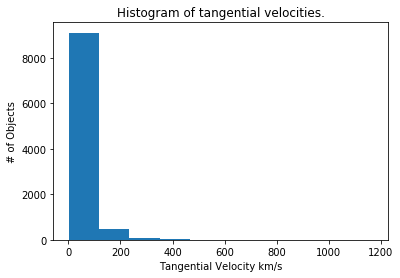

In [80]:
#Histogram of tangential velocities. Majority are less than 200km/s
plt.hist(dwarfs['vtan'])
plt.xlabel("Tangential Velocity km/s")
plt.ylabel("# of Objects")
plt.title("Histogram of tangential velocities.")

In [81]:
c = SkyCoord(ra=dwarfs["RAJ2000"], dec=dwarfs["DEJ2000"])
c

<SkyCoord (ICRS): (ra, dec) in deg
    [(5.64000000e-02, 25.905389), (3.01175000e-01, 15.592648),
     (3.83130000e-01, -8.690953), ..., (3.59806223e+02,  0.65814 ),
     (3.59902577e+02,  0.974913), (3.59918675e+02,  0.328475)]>

In [82]:
cgal=c.galactic
cgal

<SkyCoord (Galactic): (l, b) in deg
    [(108.74975179, -35.55203335), (105.52275727, -45.57424207),
     ( 87.98770508, -68.10899792), ..., ( 96.50379894, -59.50759576),
     ( 96.92229151, -59.25422798), ( 96.4493562 , -59.85482506)]>

In [83]:
#Convert to radians.....
gal_latitude=cgal.b
#gal_latitude
np.sin(np.abs(np.deg2rad(gal_latitude.value)))

array([0.58144206, 0.71415807, 0.92789482, ..., 0.86169644, 0.85944414,
       0.86475573])

In [84]:
H=365
dmax=10*10**((23.3-absG)/5)
dmax1=np.clip(dmax,0,100)
#dmax
sky_area=4*np.pi
#sky_area
ξ=(dmax1*np.sin(np.abs(np.deg2rad(gal_latitude)))/H)

In [85]:
Vmax=sky_area*((H**3)/(np.sin(np.abs(np.deg2rad(gal_latitude))))**3)*(2-((ξ**2+(2*ξ)+2)*np.exp(-ξ)))
dwarfs["Vmax"]=Vmax
                                                                                      
                                                                                                                                                                           

In [86]:
dm=5.0*(np.log10(dwarfs['Dist']/10))
absG=dwarfs['Gmag']-dm
#absG_rounded=np.rint(2*absG)
#int_absG=(absG_rounded.astype(int))
#i_close=(stellardata['Dist50']*1000<50)
dwarfs["absG"]=absG
dwarfs

Name,SpT,GravOpt,PS1,_2MCat,_2MASS,AllWISE,Ngh,Gmag,RAJ2000,DEJ2000,PS1ep,pmRA,e_pmRA,pmDE,e_pmDE,pm,e_pm,pmPA,e_pmPA,Nep,Dist,vtan,Vmax,absG
,,,,,,,,mag,deg,deg,yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,deg,deg,,pc,km / s,,
bytes27,bytes15,bytes5,bytes17,bytes7,bytes17,bytes19,uint8,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float64,float32
SDSS_J000013.54+255418.6,T4.5,,J000.0563+25.9054,2MASS_,J00001354+2554180,,--,--,0.056400,25.905389,2010.3542231,-18.4,5.5,123.1,3.3,124.5,3.4,351.5,2.5,28,14.12,8.3,6217261368.175248,--
SDSS_J000112.18+153535.5,L3.7INT-G,,J000.3012+15.5925,2MASS_,J00011217+1535355,J000112.27+153533.6,0,--,0.301175,15.592648,2011.5166324,137.3,2.2,-181.2,2.8,227.3,2.6,142.8,0.6,34,24.34,26.2,3355331356.31207,--
WISEA_J000131.93-084126.9,L1pec(blue),,J000.3831-08.6909,2MASS_,J00013166-0841234,J000131.93-084127.2,0,20.39,0.383130,-8.690953,2011.1930459,339.9,2.6,-304.9,3.3,456.6,2.9,131.9,0.4,46,--,--,1529756141.581787,--
SDSS_J000250.98+245413.8,L5.5,,J000.7124+24.9037,2MASS_,J00025097+2454141,J000250.98+245413.6,0,--,0.712466,24.903795,2010.3066940,22.4,17.4,-45.6,7.2,50.8,9.9,153.8,17.6,28,53.33,12.8,5739496857.873254,--
2MASSI_J0003422-282241,M7.5,,J000.9273-28.3785,2MASS_,J00034227-2822410,J000342.53-282242.7,0,17.19,0.927389,-28.378609,2012.5282683,285.8,1.5,-142.6,1.3,319.4,1.5,116.5,0.2,67,38.91,58.9,3427522.7303413874,14.239695
2MASS_J00044144-2058298,M8,,J001.1753-20.9747,2MASS_,J00044144-2058298,J000442.04-205828.9,0,--,1.175450,-20.974698,2011.8222587,751.9,1.9,91.9,2.5,757.5,1.9,83.0,0.2,74,18.94,68.0,1310416919.920232,--
2MASS_J00054844-2157196,M9,,J001.4543-21.9558,2MASS_,J00054844-2157196,J000549.00-215721.0,0,--,1.454361,-21.955894,2011.4017522,709.4,2.2,-122.9,2.5,720.0,2.2,99.8,0.2,66,25.43,86.8,1299972692.475267,--
ULAS_J000613.24+154020.7,L9,,J001.5553+15.6723,,,J000613.26+154020.7,0,--,1.555343,15.672398,2012.2861602,84.7,40.6,-38.5,20.4,93.0,35.6,114.4,21.4,16,43.24,19.1,3314221962.03907,--


In [87]:
np.max(absG)

20.0032

In [101]:
lf_spacedensity=np.zeros(56)

In [102]:
bins=np.linspace(7.0,20.0,56)
bin_data=np.digitize(absG,bins)
bincount=np.bincount(bin_data)

In [103]:
bin_data

array([56, 56, 56, ..., 13, 17,  9])

In [104]:
#Run a for loop to create array of luminosity function values for each absolute magnitude bin. AbsG magnitudes are
#constrained between 7 and 20
for n1 in range(absG.size):
    if ((absG[n1]>=7.0)and(absG[n1]<=20.0)):
            my_bin=bin_data[n1]
            lf_spacedensity[my_bin]+=1.0/Vmax[n1]
print(lf_spacedensity)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.11368292e-05 2.17796324e-04 1.25434760e-04 7.06474377e-05
 4.13660660e-06 4.26966537e-04 2.15457849e-05 7.29583986e-06
 6.37902014e-06 5.53716242e-04 1.42948212e-05 4.17408657e-06
 2.76390748e-07 3.11058499e-04 1.76771375e-05 3.32393577e-06
 1.14060729e-06 2.55354498e-07 2.69654098e-07 1.43446824e-04
 1.44133762e-05 1.12047008e-06 1.37836550e-06 1.64429430e-06
 3.23451756e-05 2.75104123e-05 6.46360079e-06 7.59704800e-06
 5.56890391e-06 3.74960272e-06 4.86610958e-06 3.85519764e-06
 4.68157393e-06 5.19070644e-06 7.70546574e-06 1.41898956e-05
 1.19721794e-05 1.34003267e-05 7.43996236e-06 5.36451553e-06
 3.75308729e-06 1.84574976e-06 2.48039539e-06 3.52934255e-06
 2.18965028e-06 9.89204631e-07 2.02724651e-06 0.00000000e+00
 1.66564684e-06 2.47559481e-06 2.93870682e-06 2.55272186e-06]


Text(0.5, 1.0, 'Luminosity Function with AbsG Constraints')

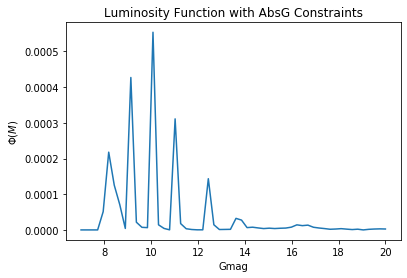

In [105]:
plt.plot(bins,lf_spacedensity)
plt.xlabel("Gmag")
plt.ylabel('$\Phi(M)$')
plt.title("Luminosity Function with AbsG Constraints")

In [106]:
len(dwarfs)

9888